## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.model_selection import RandomizedSearchCV


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Functions

In [2]:
def plotFor(test,forecasts):
    # Plotting the true values and the predicted values
    plt.figure(figsize=(12, 4))
    plt.plot(test, label='True Values', marker='o')
    plt.plot(forecasts, label='Predicted Values', marker='x')
    plt.title('Random Forest Model Forecast for the Last 24 Observations')
    plt.xlabel('Time')
    plt.ylabel('WTI Price')
    plt.legend()
    plt.show()

def calculateMAE(test, forecasts):
    mae = mean_absolute_error(test, forecasts)
    return mae

def calculateMAPE(test, forecasts):
    percentage_errors = [abs((actual - predicted) / actual) * 100 for actual, predicted in zip(test, forecasts) if actual != 0]
    mape = sum(percentage_errors) / len(percentage_errors)
    return mape

def calculateMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    return mse

def calculateRMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    rmse = sqrt(mse)
    return rmse

## Main

In [3]:
df = pd.read_excel("Renamed Columns Stationary Data/WTI.xlsx") 
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df

,WTI,WTI_LAG1,WTI_LAG2,WTI_LAG3,WTI_LAG4,USAGDP,Equity Market Volatility,3 Month Treasury Bill,Infectious Disease Tracker,COV19,RUWAR
DATE,,,,,,,,,,,
1996-07-01,0.028554,0.095448,0.084944,0.016658,-0.077023,0.020675,-4.19,0.09,-0.196710,0,0
1996-10-01,0.099040,0.028554,0.095448,0.084944,0.016658,0.012196,1.94,0.08,0.083382,0,0
1997-01-01,-0.080447,0.099040,0.028554,0.095448,0.084944,0.015662,-0.40,-0.12,-0.446287,0,0
1997-04-01,-0.135538,-0.080447,0.099040,0.028554,0.095448,0.012380,2.70,0.08,0.782759,0,0
1997-07-01,-0.006551,-0.135538,-0.080447,0.099040,0.028554,0.018502,-0.41,-0.01,0.041964,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,-0.153171,0.141561,0.198614,0.091224,0.068518,0.020373,-0.43,0.77,-0.083527,1,1
2022-10-01,-0.121634,-0.153171,0.141561,0.198614,0.091224,0.017477,-3.25,1.58,-0.269102,1,1
2023-01-01,-0.081122,-0.121634,-0.153171,0.141561,0.198614,0.015792,1.58,1.38,0.005921,1,1


In [4]:
import statsmodels.api as sm


y = df['WTI']
X = df[["WTI_LAG1","WTI_LAG2","WTI_LAG3","WTI_LAG4","USAGDP","Equity Market Volatility","3 Month Treasury Bill","Infectious Disease Tracker","COV19","RUWAR"]]

# Add a constant term to the feature matrix (for intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WTI   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     3.159
Date:                Sat, 13 Jan 2024   Prob (F-statistic):            0.00152
Time:                        15:31:22   Log-Likelihood:                 59.495
No. Observations:                 109   AIC:                            -96.99
Df Residuals:                      98   BIC:                            -67.38
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0347      0.021      1.687      0.095      -0.006       0.075
WTI_LAG1                       0.1367      0.113      1.213      0.228      -0.087       0.360
WTI_LAG2                       0.0274      0.099      0.276      0.783      -0.170       0.224
WTI_LAG3                      -0.1161      0.093     -1.251      0.214      -0.300       0.068
WTI_LAG4                      -0.0022      0.092     -0.023      0.981      -0.185       0.181
USAGDP                        -2.4187      1.288     -1.879      0.063      -4.974       0.136
Equity Market Volatility      -0.0025      0.003     -0.920      0.360      -0.008       0.003
3 Month Treasury Bill          0.0189      0.042      0.453      0.652      -0.064       0.102
Infectious Disease Tracker    -0.1156      0.032     -3.581      0.001      -0.180      -0.052
COV19                          0.1260      0.056      2.244      0.027       0.015       0.238
RUWAR                         -0.1609      0.091     -1.760      0.081      -0.342       0.020
==============================================================================
Omnibus:                       21.857   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.647
Skew:                          -0.892   Prob(JB):                     1.82e-08
Kurtosis:                       5.160   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Droping columns with P > 0.1

In [5]:
selected_columns = ["WTI","WTI_LAG1","USAGDP","Infectious Disease Tracker","COV19","RUWAR"]
pruned_df = df[selected_columns]

pruned_df = pruned_df.set_index(df.index)
pruned_df

,WTI,WTI_LAG1,USAGDP,Infectious Disease Tracker,COV19,RUWAR
DATE,,,,,,
1996-07-01,0.028554,0.095448,0.020675,-0.196710,0,0
1996-10-01,0.099040,0.028554,0.012196,0.083382,0,0
1997-01-01,-0.080447,0.099040,0.015662,-0.446287,0,0
1997-04-01,-0.135538,-0.080447,0.012380,0.782759,0,0
1997-07-01,-0.006551,-0.135538,0.018502,0.041964,0,0
...,...,...,...,...,...,...
2022-07-01,-0.153171,0.141561,0.020373,-0.083527,1,1
2022-10-01,-0.121634,-0.153171,0.017477,-0.269102,1,1
2023-01-01,-0.081122,-0.121634,0.015792,0.005921,1,1


## Tree

In [6]:
# Splitting the data into train and test sets
train, test = train_test_split(pruned_df, test_size=0.09, shuffle=False)

# Defining features and target
features = ["WTI_LAG1","USAGDP","Infectious Disease Tracker","COV19","RUWAR"]
target = "WTI"

In [7]:
# RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Hyperparameters range for Randomized Search
param_distributions = {
    'n_estimators': [200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10,30],
    'min_samples_split': [6, 10, 12],
    'min_samples_leaf': [1, 4, 6],
    'bootstrap': [True, False]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions, n_iter=500, cv=5, random_state=42, n_jobs=-1)

random_search.fit(train[features], train[target])

C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 216 is smaller than n_iter=500. Running 216 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 4, 6],
                                        'min_samples_split': [6, 10, 12],
                                        'n_estimators': [200, 300]},
                   random_state=42)

In [8]:
# Best model from random search
best_model = random_search.best_estimator_

test['PREDICTED_WTI'] = best_model.predict(test[features])

# Outputting the best parameters
best_params = random_search.best_params_
best_params

{'n_estimators': 300,
 'min_samples_split': 12,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

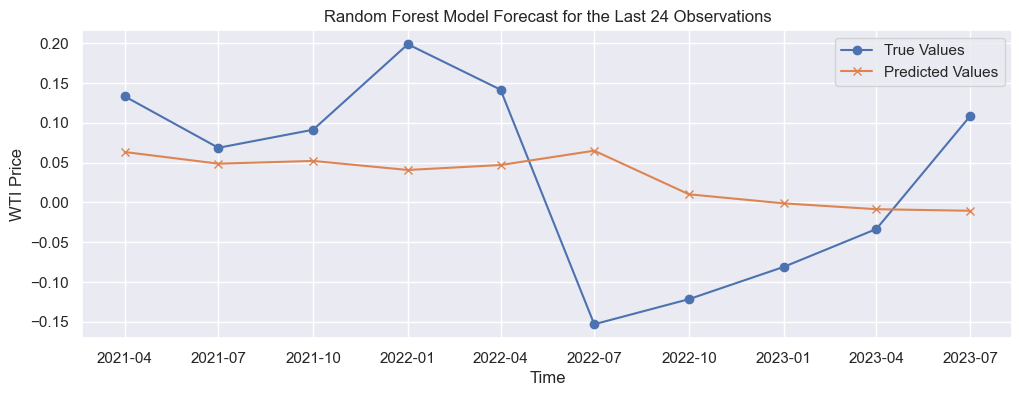

In [9]:
plotFor(test['WTI'],test['PREDICTED_WTI'])

In [10]:
y_test = test['WTI']
predictions = test['PREDICTED_WTI']

In [11]:
print(f"MAE: {calculateMAE(y_test, predictions):.4f}")
print(f"MAPE: {calculateMAPE(y_test, predictions):.4f} %")
print(f"MSE: {calculateMSE(y_test, predictions):.4f}")
print(f"RMSE: {calculateRMSE(y_test, predictions):.4f}")

MAE: 0.0955
MAPE: 80.4109 %
MSE: 0.0127
RMSE: 0.1126


## Saving Predictions

In [12]:
df = pd.DataFrame({'WTI Q RF': predictions, 'Actual': y_test})
df.to_excel("WTI_Q_RF_forecast.xlsx", index=True)
df

,WTI Q RF,Actual
DATE,,
2021-04-01,0.063234,0.133207
2021-07-01,0.048586,0.068518
2021-10-01,0.052017,0.091224
2022-01-01,0.040653,0.198614
2022-04-01,0.046862,0.141561
2022-07-01,0.064875,-0.153171
2022-10-01,0.010088,-0.121634
2023-01-01,-0.001283,-0.081122
2023-04-01,-0.008627,-0.033490


In [13]:
# Open a file in write mode
with open('WTI Q RF Results.txt', 'w') as file:
    # Write the variables to the file
    file.write(f'{calculateMAE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMAPE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMSE(y_test, predictions):.4f}\n')
    file.write(f'{calculateRMSE(y_test, predictions):.4f}\n')